In [3]:
# import libs
import pandas as pd
import matplotlib.pyplot as mp
import os
from datetime import datetime
import time
from dateutil import parser

In [4]:
# Read in files
sample_size = 200
files = os.listdir('/Users/Lucas/Downloads/Data/Stocks/')
master_df = pd.DataFrame()
for file in files[0:sample_size]:
    if(file.endswith('.csv')):
        try:
            df = pd.read_csv('/Users/Lucas/Downloads/Data/Stocks/'+file)
            df['Symbol'] = [file]*len(df)
            master_df = pd.concat([master_df, df], axis=0)
        except:           
            continue

df = master_df

In [5]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,386968.000000,386968.000000,386968.000000,386968.000000,3.869680e+05,386968.0
mean,37.269837,37.752836,36.770659,37.272442,1.512746e+06,0.0
std,70.087205,70.958961,69.193916,70.086944,4.730975e+06,0.0
min,0.120100,0.120100,0.112100,0.120100,0.000000e+00,0.0
25%,9.361475,9.500000,9.220000,9.369100,3.360375e+04,0.0
50%,19.723000,20.000000,19.417000,19.723000,2.129330e+05,0.0
75%,35.176250,35.620000,34.713150,35.165250,1.191272e+06,0.0
max,1068.750000,1106.240000,1047.050000,1068.750000,4.098206e+08,0.0


In [8]:
# Sort values by date
df = df.sort_values('Date')

In [14]:
# Use date column to create timestamps
timestamps = []
count = 0

for i, row in df.iterrows():
    date = parser.parse(row['Date'])
    temp = time.mktime(date.timetuple())
    timestamps.append(temp)
    count = count + 1
        
# Add timestamp column and assign to newly created timestamp values
df['Timestamp'] = timestamps

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109ccccf8>]],
      dtype=object)

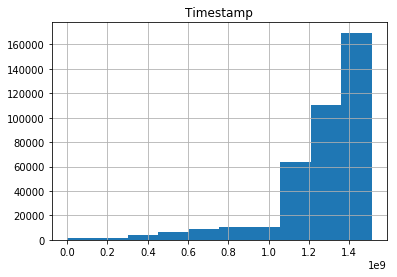

In [15]:
# Lets get an idea of when our stock data is most concentrated
# We can see that the data is concentrated at 2010 and onwards
df.hist('Timestamp')

In [16]:
# It might be useful to consider market volatility, in addition to the trading volume already provided
# The 'Daily Change' is intended to be an indication of market volatility
# It is calculated by taking the difference between the high and low price for a given trading day

delta = []
for i, row in df.iterrows():
    _open = row['Open'] 
    close = row['Close']
    delta.append(close-_open)
    

df['Daily Change'] = delta

In [17]:
# Track which days (for each stock) displayed a positive change,
# meaning the SP* increased from open to close. 
#
# *SP = Stock Price

positive = []
for i, row in df.iterrows():
    change = row['Daily Change']
    if(change > 0):            #positive
        positive.append('1')
    elif(change < 0):          #negative
        positive.append('-1')
    else:                      #neutral
        positive.append('0')
        
df['Positive'] = positive

In [18]:
# It would be more meaningful to track the varience of a stock's price 
# as a percentage the price for that stock, rather than an absolute change. 
#
# Consider a dollar change in SP for GOOG (SP on the order of > 100$/share)  
# versus a dollar change for a penny stock valued at <1$/share. These are
# clearly not equivalently impactful changes, hence the need for this column

delta = []
for i, row in df.iterrows():
    change = row['Daily Change']
    close = row['Open']
    delta.append((change/close)*100)
    
df['Daily Change Percentage'] = delta

In [19]:
# Add a color column for the sake of visualizing positive days versus negative days, as seen below
df['color'] = 'g'
df.loc[df['Positive'] == '-1', 'color'] = 'r'

In [20]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt,Timestamp,Daily Change,Daily Change Percentage
count,386968.000000,386968.000000,386968.000000,386968.000000,3.869680e+05,386968.0,3.869680e+05,386968.000000,386968.000000
mean,37.269837,37.752836,36.770659,37.272442,1.512746e+06,0.0,1.268622e+09,0.002604,0.045415
std,70.087205,70.958961,69.193916,70.086944,4.730975e+06,0.0,2.411859e+08,1.107932,3.088925
min,0.120100,0.120100,0.112100,0.120100,0.000000e+00,0.0,1.044000e+05,-55.647000,-90.138136
25%,9.361475,9.500000,9.220000,9.369100,3.360375e+04,0.0,1.191816e+09,-0.145000,-0.854106
50%,19.723000,20.000000,19.417000,19.723000,2.129330e+05,0.0,1.330060e+09,0.000000,0.000000
75%,35.176250,35.620000,34.713150,35.165250,1.191272e+06,0.0,1.433822e+09,0.150000,0.871460
max,1068.750000,1106.240000,1047.050000,1068.750000,4.098206e+08,0.0,1.510290e+09,38.400000,902.456732


(-50, 50)

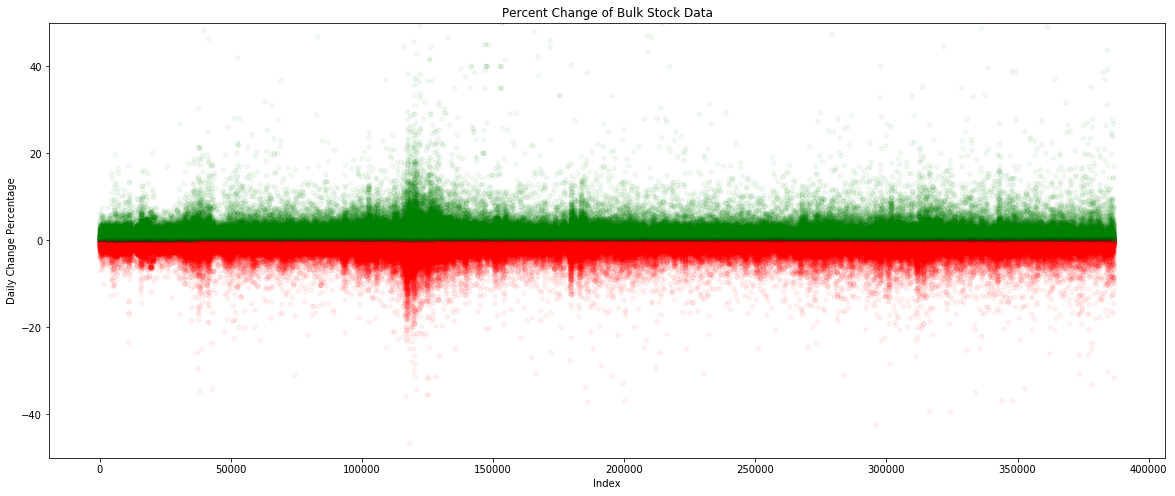

In [23]:
# Plot the percent change for each stock over time, out of curiosity
# It is interesting to see that the data is almost perfectly reflected about the x axis,
# indicating that periods of positive change are matched with negative changes
# 
# The period of volatility around the timestamp 100000 corresponds to the 2008-2009 market crash
#
# TODO: Index plot by date to increase readability

df['Time'] = pd.to_datetime(df['Date'])
df['Index'] = list(range(0,len(df)))
df.plot(color=df['color'],
            kind='scatter',
            x='Index',
            y='Daily Change Percentage',
            alpha=0.05, 
            figsize=(20,8),
            title='Percent Change of Bulk Stock Data')
mp.ylim(-50,50)

# Machine Learning Starts Here

In [110]:
# More imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [111]:
# Initialize Dataframe
training_data=df

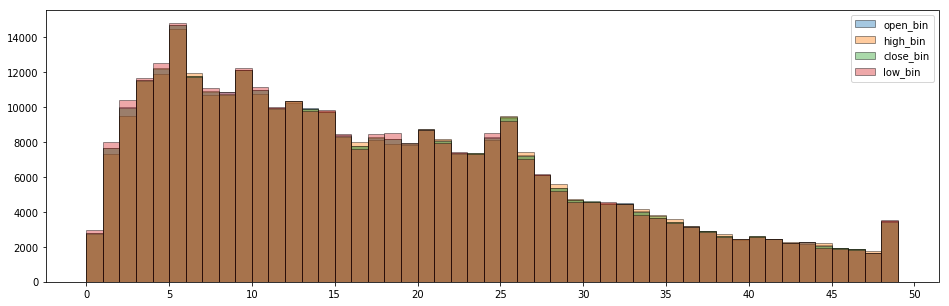

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118d78dd8>]],
      dtype=object)

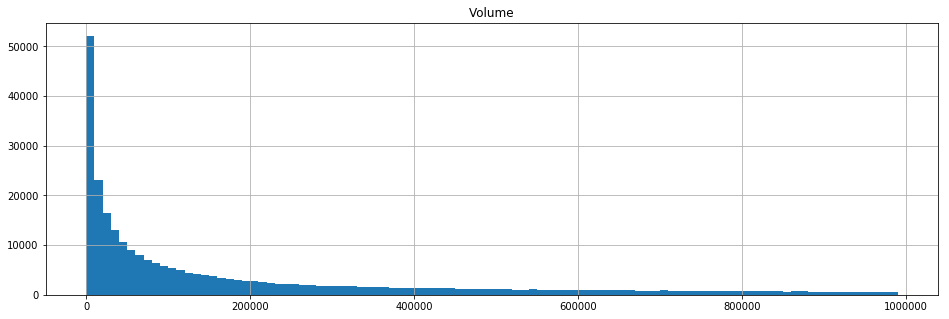

In [357]:
# Plot the distribution of the data in the colums of interest
# training_data.hist('Open', bins = list(range(0,50,2)))
# training_data.hist('Close', bins = list(range(0,50,2)))
# training_data.hist('High', bins = list(range(0,50,2)))
# training_data.hist('Low', bins = list(range(0,50,2)))

col_names = ['Open', 'Close', 'High', 'Low' ]
for _bin in bin_names:
    mp.hist(training_data[_bin], alpha=a, label=_bin, bins = list(range(0,50,bin_size)), edgecolor='black', linewidth=lw)

mp.xticks(range(0,51,5))
mp.legend(loc='upper right')
mp.show()

training_data.hist('Volume', bins = list(range(0,1000000 ,10000)))

In [133]:
# Set up bins
bin_size = 1
bins = list(range(0,50, bin_size))
vol_bin = list(range(0,4))

In [134]:
# Bin volume on a logarithmic scale to obtain a more balanced distribution across bins
# [0-10000][10000-100000][100000-1000000][1000000-infinity]
vol_bin = []

for i, row in training_data.iterrows():
    vol = row['Volume']
    
    flag = 0
    
    if(vol >= pow(10,6)):
        vol_bin.append(4)
        continue
    
    for j, _bin in enumerate(bins):
        if(vol < pow(10,j+4)):
            vol_bin.append(j)
            break
            

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12567d080>]],
      dtype=object)

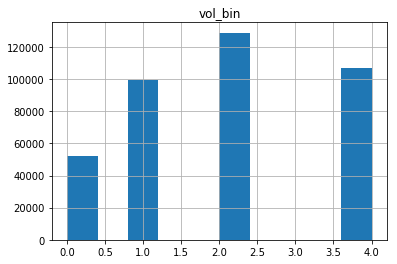

In [135]:
# Plot the distribition
training_data['vol_bin'] = vol_bin
training_data.hist("vol_bin")

In [259]:
# Bin data

open_bin = []
high_bin = []
close_bin = []
low_bin = []

for i, row in training_data.iterrows():
    o = row['Open']
    hi = row['High']
    cl = row['Close']
    lo = row['Low']
    
    group = [o,hi,cl,lo]
    bin_group = [open_bin, high_bin, close_bin, low_bin]
    
    for k, item in enumerate(group):
        for j, _bin in enumerate(bins):
            if (item < _bin + bin_size):
                item = j
                bin_group[k].append(item)
                break
            # Discard this data as it corresponds to an outlier
            elif(item >= 50):
                item = -1
                bin_group[k].append(item)
                break

In [137]:
# Add newly created bins to the dataframe
training_data['open_bin'] = open_bins
training_data['close_bin'] = close_bins
training_data['high_bin'] = high_bins
training_data['low_bin'] = low_bins
training_data.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Symbol,Timestamp,Daily Change,...,color,Time,Index,open_bin,close_bin,high_bin,low_bins,vol_bin,stock index,low_bin
0,1970-01-02,167.25,173.91,167.25,173.91,9300,0,nav.us.csv,104400.0,6.66,...,g,1970-01-02,0,-1,-1,-1,-1,0,4,-1
1,1970-01-05,174.74,184.72,174.74,182.23,17700,0,nav.us.csv,363600.0,7.49,...,g,1970-01-05,1,-1,-1,-1,-1,1,4,-1
2,1970-01-06,182.23,184.72,179.73,183.06,12300,0,nav.us.csv,450000.0,0.83,...,g,1970-01-06,2,-1,-1,-1,-1,1,4,-1
3,1970-01-07,183.06,183.89,180.56,180.56,7900,0,nav.us.csv,536400.0,-2.50,...,r,1970-01-07,3,-1,-1,-1,-1,0,4,-1
4,1970-01-08,180.56,182.23,179.73,180.56,7800,0,nav.us.csv,622800.0,0.00,...,g,1970-01-08,4,-1,-1,-1,-1,0,4,-1


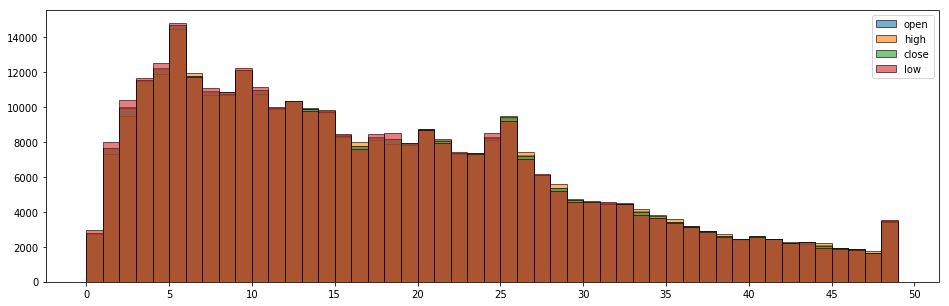

In [364]:
a = .6
lw = 1

bin_names = ['open_bin', 'high_bin', 'close_bin', 'low_bin' ]
for _bin in bin_names:
    name = _bin.split('_')[0]
    mp.hist(training_data[_bin], alpha=a, label=name, bins = list(range(0,50,bin_size)), edgecolor='black', linewidth=lw)

mp.xticks(range(0,51,5))
mp.legend(loc='upper right')
mp.show()

In [139]:
stock_names = set(training_data['Symbol'])
stock_index = []

for i, row in training_data.iterrows():
    stockname = row['Symbol']
    for index, name in enumerate(list(stock_names)):
        if (stockname == name):
            stock_index.append(index)
            

In [140]:
training_data['stock index'] = stock_index
training_data.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Symbol,Timestamp,Daily Change,...,color,Time,Index,open_bin,close_bin,high_bin,low_bins,vol_bin,stock index,low_bin
0,1970-01-02,167.25,173.91,167.25,173.91,9300,0,nav.us.csv,104400.0,6.66,...,g,1970-01-02,0,-1,-1,-1,-1,0,4,-1
1,1970-01-05,174.74,184.72,174.74,182.23,17700,0,nav.us.csv,363600.0,7.49,...,g,1970-01-05,1,-1,-1,-1,-1,1,4,-1
2,1970-01-06,182.23,184.72,179.73,183.06,12300,0,nav.us.csv,450000.0,0.83,...,g,1970-01-06,2,-1,-1,-1,-1,1,4,-1
3,1970-01-07,183.06,183.89,180.56,180.56,7900,0,nav.us.csv,536400.0,-2.50,...,r,1970-01-07,3,-1,-1,-1,-1,0,4,-1
4,1970-01-08,180.56,182.23,179.73,180.56,7800,0,nav.us.csv,622800.0,0.00,...,g,1970-01-08,4,-1,-1,-1,-1,0,4,-1


In [141]:
# Filter out data marked as unwanted
feats_labels = training_data[['open_bin', 'close_bin', 'high_bin', 'low_bin', 'stock index','vol_bin']]
feats_labels = feats_labels[~feats_labels['open_bin'].isin([-1])]

In [142]:
features = feats_labels[['close_bin', 'vol_bin', 'high_bin', 'low_bin', 'stock index']]
labels = feats_labels[['open_bin']]

X_train, X_test, y_train, y_test = train_test_split(
    features, labels,
    test_size=0.40, random_state=75)

In [268]:
clf =  RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [269]:
cf_report = classification_report(y_true = y_test, y_pred=y_pred)
print (cf_report)

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1142
          1       0.98      0.96      0.97      3104
          2       0.94      0.95      0.94      4047
          3       0.93      0.93      0.93      4512
          4       0.92      0.90      0.91      4792
          5       0.91      0.93      0.92      5880
          6       0.90      0.88      0.89      4642
          7       0.88      0.87      0.88      4327
          8       0.86      0.87      0.86      4358
          9       0.88      0.87      0.87      4883
         10       0.85      0.85      0.85      4334
         11       0.81      0.82      0.82      3938
         12       0.82      0.81      0.82      4106
         13       0.82      0.83      0.82      4057
         14       0.81      0.81      0.81      3874
         15       0.78      0.77      0.78      3382
         16       0.79      0.77      0.78      3132
         17       0.78      0.81      0.80   

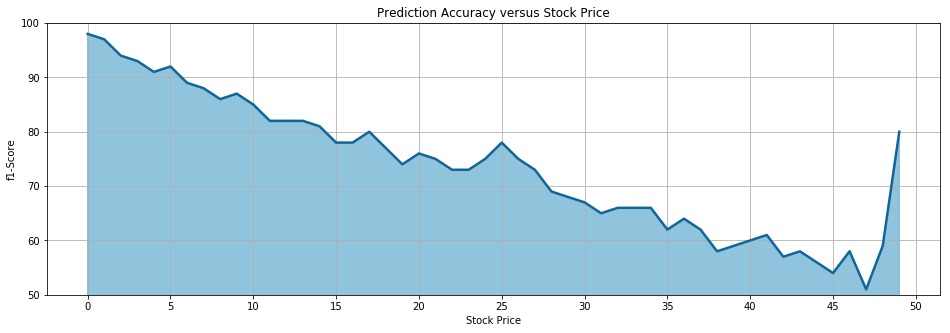

In [367]:
lines = cf_report.split('\n')

indices = []
precision = []
for line in lines[2 : (len(lines) - 3)]:
    t = line.split()
    indices.append(int(t[0]))
#     indices.append(0)
    precision.append(float(t[3])*100)

fig, ax = mp.subplots()
ax.fill_between(indices,precision, alpha=.5, color='#2288bb')
ax.set_ylim([50,100])
figsize = mp.rcParams["figure.figsize"]
figsize[0] = 16
figsize[1] = 5
mp.xticks(range(0,51,5))
ax.plot(indices,precision,color='#116699', linewidth=2.5)
ax.grid(True)
mp.title("Prediction Accuracy versus Stock Price")
mp.ylabel("f1-Score")
mp.xlabel("Stock Price")
mp.show()


In [128]:
import numpy as np
importances = clf.feature_importances_
indices = np.argsort(importances)

In [368]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(
    criterion='gini', max_depth=5,
    max_features=None, max_leaf_nodes=10,
    min_impurity_split=1e-07, min_samples_leaf=10)
clf.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [369]:
clf.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [370]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

IndexError: index 5 is out of bounds for axis 1 with size 5

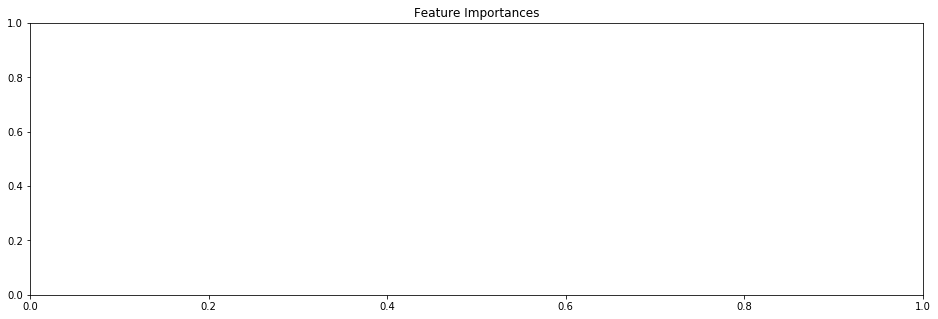

In [371]:
mp.figure(1)
mp.title('Feature Importances')
mp.barh(range(len(indices)), importances[indices], color='r', align='center')
mp.yticks(range(len(indices)), features)
mp.xlabel('Relative Importance')

## Regression approach: LSTM

In [467]:
training_data.sort_values("Date")

,Date,Open,High,Low,Close,Volume,OpenInt,Symbol,Timestamp,Daily Change,...,color,Time,Index,open_bin,close_bin,high_bin,low_bins,vol_bin,stock index,low_bin
0,1970-01-02,167.2500,173.9100,167.2500,173.9100,9300,0,nav.us.csv,1.044000e+05,6.6600,...,g,1970-01-02,0,-1,-1,-1,-1,0,4,-1
1,1970-01-05,174.7400,184.7200,174.7400,182.2300,17700,0,nav.us.csv,3.636000e+05,7.4900,...,g,1970-01-05,1,-1,-1,-1,-1,1,4,-1
2,1970-01-06,182.2300,184.7200,179.7300,183.0600,12300,0,nav.us.csv,4.500000e+05,0.8300,...,g,1970-01-06,2,-1,-1,-1,-1,1,4,-1
3,1970-01-07,183.0600,183.8900,180.5600,180.5600,7900,0,nav.us.csv,5.364000e+05,-2.5000,...,r,1970-01-07,3,-1,-1,-1,-1,0,4,-1
4,1970-01-08,180.5600,182.2300,179.7300,180.5600,7800,0,nav.us.csv,6.228000e+05,0.0000,...,g,1970-01-08,4,-1,-1,-1,-1,0,4,-1
5,1970-01-09,180.5600,180.5600,176.4000,178.0700,16500,0,nav.us.csv,7.092000e+05,-2.4900,...,r,1970-01-09,5,-1,-1,-1,-1,1,4,-1
6,1970-01-12,178.0700,180.5600,173.0700,175.5700,11700,0,nav.us.csv,9.684000e+05,-2.5000,...,r,1970-01-12,6,-1,-1,-1,-1,1,4,-1
7,1970-01-13,175.5700,176.4000,171.4100,173.0700,9600,0,nav.us.csv,1.054800e+06,-2.5000,...,r,1970-01-13,7,-1,-1,-1,-1,0,4,-1
8,1970-01-14,172.2400,172.2400,167.2500,168.9100,14400,0,nav.us.csv,1.141200e+06,-3.3300,...,r,1970-01-14,8,-1,-1,-1,-1,1,4,-1
9,1970-01-15,167.2500,167.2500,164.7500,165.5900,17900,0,nav.us.csv,1.227600e+06,-1.6600,...,r,1970-01-15,9,-1,-1,-1,-1,1,4,-1


In [382]:
import sys
sys.path.insert(0, "./anaconda3/lib/python3.6/site-packages")
!pip install tensorflow

    100% |████████████████████████████████| 45.3MB 29kB/s eta 0:00:011
    100% |████████████████████████████████| 1.2MB 788kB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 1.1MB/s ta 0:00:01
    100% |████████████████████████████████| 3.1MB 394kB/s ta 0:00:01
    100% |████████████████████████████████| 1.6MB 585kB/s ta 0:00:01
    100% |████████████████████████████████| 890kB 803kB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 1.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for termcolor ... done
  Stored in directory: /Users/Lucas/Library/Caches/pip/wheels/de/f7/bf/1bcac7bf30549e6a4957382e2ecab04c88e513117207067b03
  Running setup.py bdist_wheel for absl-py ... done
  Stored in directory: /Users/Lucas/Library/Caches/pip/wheels/76/f7/0c/88796d7212af59bb2f496b12267e0605f205170781e9b86479
  Running setup.py bdist_wheel for gast ... done
  Stored in directory: /Users/Lucas/Library/Caches/pip/wheels/8e/fa/d6/77dd17d18ea23fd7b860e02623d27c1be451521af40dd4a

In [595]:
stock_numbers = training_data.groupby("Symbol").agg("count").sort_values("Date", ascending = False)
# stock_train = training_data[training_data["Symbol"] == "nav.us.csv"].sort_values("Date")
stock_train = training_data[training_data["Symbol"] == "nav.us.csv"].sort_values("Volume")
print ("Number of data points to work with:" ,len(stock_train))

Number of data points to work with: 12075


In [952]:
stock_train = bounded_subset[["Close"]]

In [953]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [954]:
lstm_input = stock_train.values
lstm_input = lstm_input.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(lstm_input)

In [955]:
A = [ 1, 2, 3, 4, 5]
B = A[:]

B.insert(0,0)
B = B[0:-1]
print(A)
print(B)

[1, 2, 3, 4, 5]
[0, 1, 2, 3, 4]


In [956]:
print(test, new_test)

[[0.6136365 ]
 [0.6073427 ]
 [0.62167835]
 [0.63566446]
 [0.6622379 ]
 [0.7000003 ]
 [0.70314693]
 [0.7010491 ]
 [0.687063  ]
 [0.6961541 ]
 [0.7493007 ]
 [0.70559454]
 [0.7681818 ]
 [0.76678324]
 [0.7632868 ]
 [0.81958055]
 [0.8297205 ]
 [0.82692313]
 [0.8447554 ]
 [0.9052448 ]
 [0.9003496 ]
 [0.85909104]
 [0.9384618 ]
 [0.9122379 ]
 [0.82552457]
 [0.69335675]
 [0.8097904 ]
 [0.7496505 ]
 [0.5888114 ]
 [0.6996505 ]
 [0.73286724]
 [0.7573428 ]
 [0.79160833]
 [0.8562939 ]
 [0.8332169 ]
 [0.85839176]
 [0.8153846 ]
 [0.8237765 ]
 [0.9052448 ]
 [0.9527972 ]
 [0.9101398 ]
 [0.8951049 ]
 [0.8629372 ]
 [0.86993027]
 [0.89055943]
 [0.8793707 ]
 [0.898252  ]
 [0.9181819 ]
 [0.99195814]
 [1.        ]
 [0.91748285]
 [0.89790225]
 [0.90944076]
 [0.9241259 ]
 [0.8643358 ]
 [0.8727274 ]
 [0.85000014]
 [0.75594425]
 [0.6646855 ]
 [0.89545465]
 [0.7447555 ]
 [0.74195814]
 [0.8076923 ]
 [0.71153855]
 [0.7531469 ]
 [0.8447554 ]
 [0.8465035 ]
 [0.7713289 ]
 [0.7902098 ]
 [0.863986  ]
 [0.82832193]
 [0.88

# Given today's closing price, what is tomorrow's closing price?
### Features: Current Price, Label: Next day's price

In [957]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[(i + look_back), 0])
    return numpy.array(dataX), numpy.array(dataY)

In [958]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
print(train_size/len(dataset), test_size/len(dataset))
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

0.669683257918552 0.33031674208144796


In [959]:
train.shape

(148, 1)

In [960]:
# reshape into X=t and Y=t+1
import numpy
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX[0:5], trainY[0:5].T)

[[0.07832193]
 [0.05839157]
 [0.06748247]
 [0.12552452]
 [0.14370632]] [0.05839157 0.06748247 0.12552452 0.14370632 0.15209794]


In [961]:
# samples need to be in this form: [samples, look_back, features]

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1,testX.shape[1]))
trainY = numpy.reshape(trainY, (trainY.shape[0],1))
testY = numpy.reshape(testY, (testY.shape[0], 1))

In [962]:
print(testX.shape, trainX.shape, trainY.shape, testY.shape)

(71, 1, 1) (146, 1, 1) (146, 1) (71, 1)


In [963]:
import keras
from IPython.display import clear_output

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = mp.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        mp.plot(self.x, self.losses, label="loss")
        mp.plot(self.x, self.val_losses, label="val_loss")
        mp.legend()
        mp.show();
        
plot_losses = PlotLosses()

In [964]:
# Neural network operations: Wx + b
#backpropagation: go back through the layers and adjust the weights and biases each time
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.pyimagesearch.com/wp-content/uploads/2016/08/simple_neural_network_header.jpg")


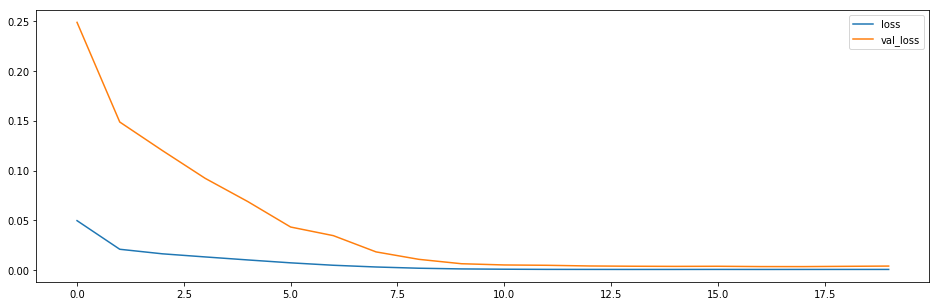

In [965]:
# create and fit the network

model = Sequential()
model.add(LSTM(4, input_shape = (1,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, callbacks=[plot_losses], validation_data=(testX, testY), verbose=2)

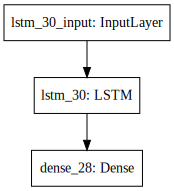

In [966]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [967]:
to_file='model_plot.png',plot_model(model, show_shapes=True, show_layer_names=True)

In [968]:
 model.layers[0].get_weights()

[array([[ 0.10050629,  0.7775108 ,  0.49110338,  0.1908278 ,  0.10700822,
         -0.5062088 ,  0.538033  ,  0.01605028,  0.4455666 ,  0.9706159 ,
          0.74705744, -0.72050667,  0.38026467,  0.01361046,  0.5878508 ,
          1.0888959 ]], dtype=float32),
 array([[-0.3733188 , -0.06187413,  0.18344975, -0.30635664,  0.03842081,
          0.19476527,  0.09025705,  0.2559951 , -0.16718374,  0.3906931 ,
         -0.22529942, -0.14782113, -0.43665466, -0.36386168,  0.12647499,
         -0.15474506],
        [-0.07062989, -0.2187652 ,  0.34153324, -0.2586815 ,  0.41251466,
         -0.04312782, -0.40985566, -0.06900588,  0.11027059, -0.25943205,
         -0.24721818,  0.2229731 ,  0.01766795,  0.28964266,  0.26790428,
         -0.26934022],
        [-0.02354527, -0.08202729,  0.25092387, -0.02598565,  0.26569387,
          0.4426255 ,  0.38677645,  0.22260092, -0.29315263, -0.40403023,
          0.28299516,  0.2568345 ,  0.0965936 , -0.07942256, -0.22814816,
          0.0224137 ],
   

In [970]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions back to original values

# norm_trainPredict = scaler.inverse_transform(trainPredict)
# norm_trainY = scaler.inverse_transform([trainY])

# norm_testPredict = scaler.inverse_transform(testPredict)
# norm_testY = scaler.inverse_transform([testY])

In [971]:
#get a score
import math

trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.029 RMSE
Test Score: 0.065 RMSE


In [975]:
# shift train predictions for plotting
look_back = 1
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [976]:
fullPredict = np.concatenate([trainPredict, testPredict],axis = 0)
fullPredict = list(fullPredict)
print(fullPredict[1][0])

0.062348768


In [977]:
norm_fullPredict = scaler.fit_transform(fullPredict)

In [978]:
error = []

for i in list(range(0, 8085)):
    error.append(np.absolute((dataset[i][0]-norm_fullPredict[i][0])*100/dataset[i][0]))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


IndexError: index 217 is out of bounds for axis 0 with size 217

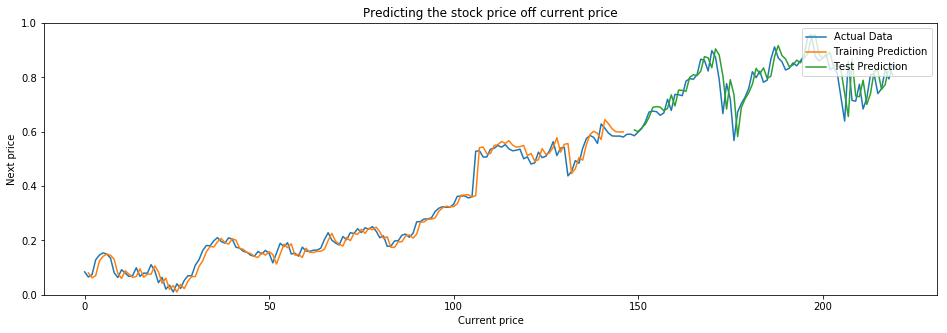

In [979]:
# plot baseline and predictions
mp.plot(scaler.inverse_transform(dataset), label = 'Actual Data')
mp.plot(trainPredictPlot, label = 'Training Prediction')
mp.title("Predicting the stock price off current price")
mp.xlabel("Current price")
mp.ylabel("Next price")
mp.plot(testPredictPlot, label = 'Test Prediction')
mp.legend(loc='upper right')
mp.ylim(0,1)
mp.show()

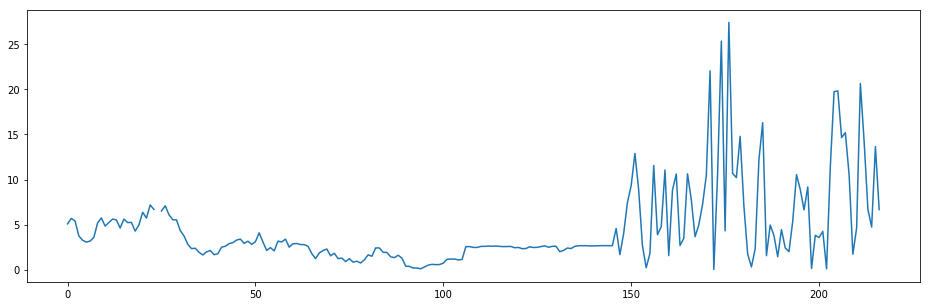

In [980]:
plt = mp.subplot()
plt.plot(error)

In [925]:
miss_count = 0
for i,item in enumerate(dataset[0:12071]):
    miss = error[i]
    actual_error = (miss/item)*100
    if (actual_error > 20):
        miss_count = miss_count + 1
    
        
print(miss_count/len(error)*100)

IndexError: list index out of range

In [900]:
stock_train[stock_train['Close'] > 70]
msft_df.iloc[7868]
bounded_subset = msft_df[7868:]
bounded_subset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
7868,2017-05-30,69.790001,70.410004,69.769997,70.410004,69.361061,17072800
7869,2017-05-31,70.529999,70.739998,69.809998,69.839996,68.799545,30436400
7870,2017-06-01,70.239998,70.610001,69.449997,70.099998,69.055672,21603600
7871,2017-06-02,70.440002,71.860001,70.239998,71.760002,70.690948,34770300
7872,2017-06-05,71.970001,72.889999,71.809998,72.279999,71.203201,33316800


In [987]:
# Regression vs classification
# (Comparing LSTM vs Random forest classification)

# Model Tuning

# number of of features
    # synthetic columns (daily change percentage for example)

# hyperparameter configs
    # number of layers
    # dropout
    # learning rate
    # etc.
    
    # find configs with grid search, random search etc. (find optimal hyperparameters)


In [986]:
value = np.array([[[0.010]]])
model.predict(value)

# value = np.array(value)
# print(value.shape)
# print(value[0])
# value = value.reshape((value[0], 1,1))
# # model.predict([10220,1,1])

array([[0.01900459]], dtype=float32)

In [650]:
msft_df = pd.read_csv('/Users/Lucas/Downloads/MSFT.csv')

8089
         Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.071441  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.073992   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.075268   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.073354    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.072079    47894400
            Date      Open      High      Low  Close  Adj Close    Volume
3502  2000-01-20  53.53125  54.84375  52.9375   53.0  38.945423  56349800


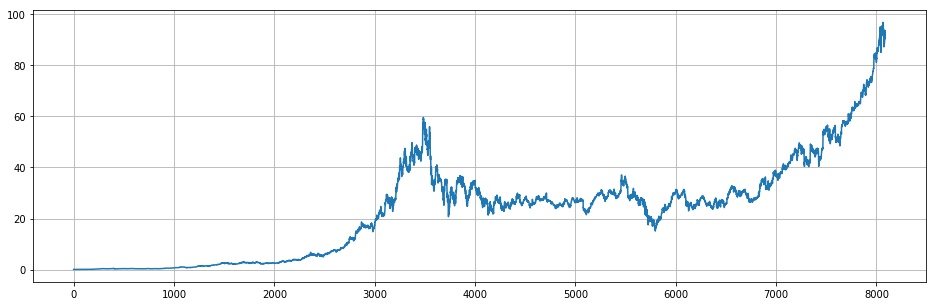

In [653]:
print(len(msft_df))
print(msft_df.head())

mp.plot(msft_df['Close'])
print(msft_df.iloc[[3502]])
mp.grid(True)